In [116]:
import pandas as pd #abrindo o csv referente às reclamções do 2do semestre de 2016
dataset = pd.read_csv('semestre_2016-2.csv', sep = ';', encoding = 'latin1')
dataset.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,NE,PI,São Raimundo Nonato,M,entre 21 a 30 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,S,S,Finalizada avaliada,Resolvida,4.0,1
1,CO,GO,Aparecida de Goiânia,F,entre 21 a 30 anos,30/07/2016,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Má qualidade no atendimento presencial ou outr...,Domicílio,S,S,Finalizada avaliada,Não Resolvida,5.0,1
2,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,31/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
4,SE,MG,Oliveira,F,até 20 anos,30/07/2016,1.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Demais aparelhos de comunicação,Cobrança / Contestação,Dificuldade na devolução de valores pagos / re...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,3.0,1


In [117]:
dataset.count() #quantidade de dados refente a cada coluna

Região                    162584
UF                        162584
Cidade                    162584
Sexo                      162584
Faixa Etária              162584
Data Finalização          162584
Tempo Resposta            161993
Nome Fantasia             162584
Segmento de Mercado       162584
Área                      162584
Assunto                   162584
Grupo Problema            162584
Problema                  162584
Como Comprou Contratou    162584
Procurou Empresa          162584
Respondida                162584
Situação                  162584
Avaliação Reclamação      162584
Nota do Consumidor         95118
Total                     162584
dtype: int64

In [118]:
dataset['Sexo'].value_counts() #quantidade de reclamações por sexo

M    95462
F    67122
Name: Sexo, dtype: int64

In [119]:
dataset.groupby('Sexo')['Faixa Etária'].value_counts() #relação de faixa etária e gênero com o numero de reclamações

Sexo  Faixa Etária      
F     entre 21 a 30 anos    20470
      entre 31 a 40 anos    19617
      entre 41 a 50 anos    10626
      entre 51 a 60 anos     8306
      entre 61 a 70 anos     4242
      até 20 anos            1958
      mais de 70 anos        1903
M     entre 21 a 30 anos    33597
      entre 31 a 40 anos    31049
      entre 41 a 50 anos    13501
      entre 51 a 60 anos     8171
      entre 61 a 70 anos     4260
      até 20 anos            3170
      mais de 70 anos        1714
Name: Faixa Etária, dtype: int64

In [120]:
dataset['Grupo Problema'].value_counts() #qual o problema mais comum?

Cobrança / Contestação    67074
Contrato / Oferta         29460
Vício de Qualidade        20832
Atendimento / SAC         19883
Informação                18322
Entrega do Produto         6403
Saúde e Segurança           610
Name: Grupo Problema, dtype: int64

In [121]:
segmento = dataset[dataset['Grupo Problema'] == 'Cobrança / Contestação'] #qual segmento de mercado mais afetado?
segmento['Segmento de Mercado'].value_counts()                            #

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    36106
Bancos, Financeiras e Administradoras de Cartão                            21829
Comércio Eletrônico                                                         3144
Bancos de Dados e Cadastros de Consumidores                                  998
Transporte Aéreo                                                             733
Energia Elétrica, Gás, Água e Esgoto                                         691
Empresas de Recuperação de Crédito                                           597
Varejo                                                                       553
Operadoras de Planos de Saúde e Administradoras de Benefícios                406
Perfumaria, Cosméticos e Higiene Pessoal                                     404
Corretoras e Sociedades de Seguros, Capitalização e Previdência              384
Agências de Viagens                                                          381
Administradoras de Consórcio

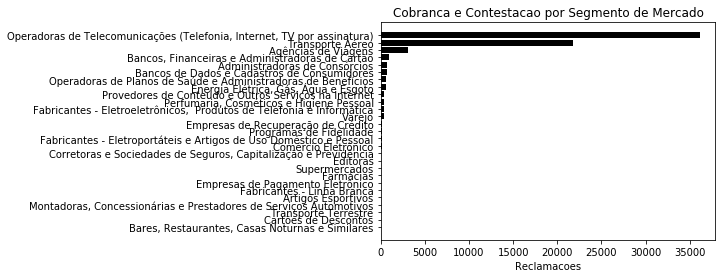

In [122]:
fig,ax = plt.subplots() #Segmentos de mercado com maiores reclamaçoes referentes à problema de Cobrança e Contestação

y_pos = np.arange(len(segmento['Segmento de Mercado'].value_counts()))
values = segmento['Segmento de Mercado'].value_counts()
segmentos = segmento['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align = 'center', color = 'black')

ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)

ax.invert_yaxis()

ax.set_xlabel('Reclamacoes')
ax.set_title('Cobranca e Contestacao por Segmento de Mercado')
plt.show()

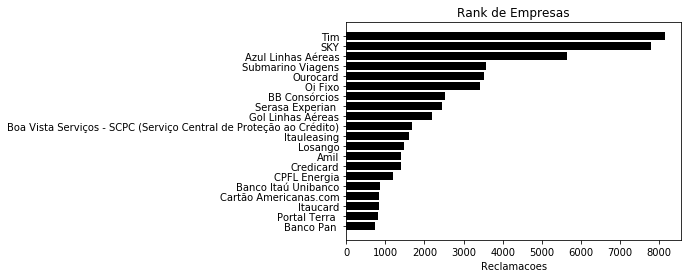

In [123]:
fig, ax = plt.subplots() #Rank das empresas referentes ao grafico acima

y_pos = np.arange(len(segmento['Nome Fantasia'].value_counts()[:20]))
values = segmento['Nome Fantasia'].value_counts()[:20]
segmentos = segmento['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align = 'center', color = 'black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)

ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')
plt.show()

                    Tempo Resposta  Nota do Consumidor
Tempo Resposta            1.000000           -0.118709
Nota do Consumidor       -0.118709            1.000000


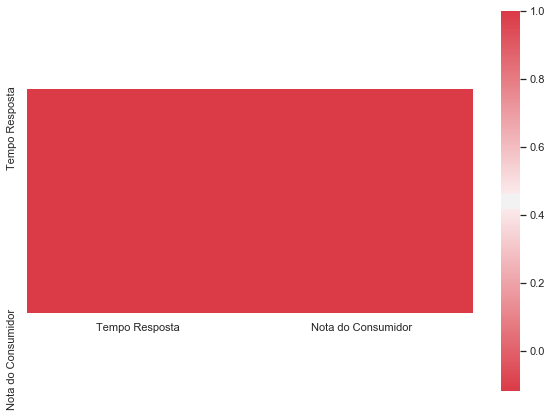

In [175]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 7))
#dataset = dataset.drop('Total',axis=1) [ocorre um erro ao plotar o grafico corretamente, creio que seja no pacote seaborn.]
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 10, as_cmap=True), square=True, ax=ax)

#porém temos o numero correto da correlação
print(corr)

In [134]:
x = dataset.groupby('Segmento de Mercado')['Segmento de Mercado'].count() #representando a relação entre Problemas Não Resolvidos com o Total de Reclamações
#filtrando os segmentos com mais de 20 reclamações
x = x[x>20]
df = dataset[dataset['Segmento de Mercado'].isin(x.keys())] #construindo variáveis
df = df[df['Avaliação Reclamação'] == 'Não Resolvida']
x1 = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

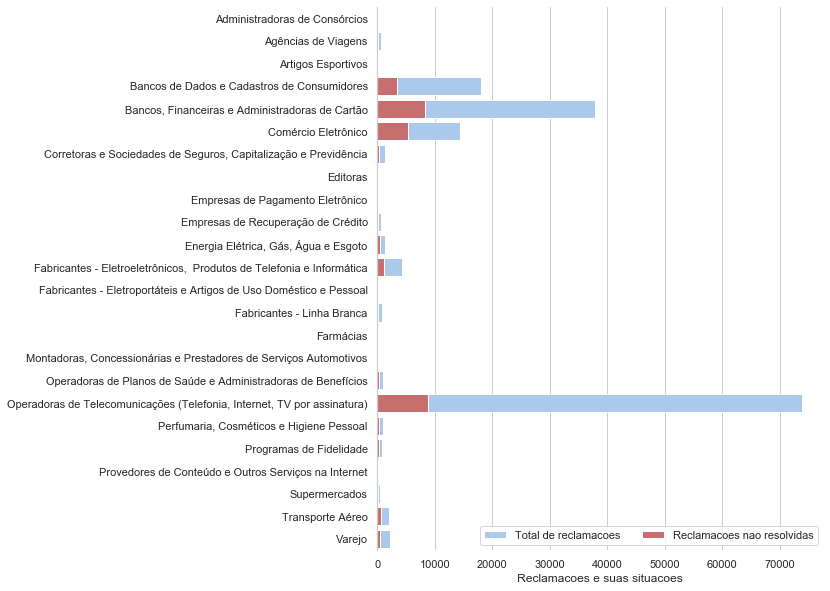

In [135]:
import seaborn as sns #plotando o grafico
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (8, 10))
sns.set_color_codes('pastel')
sns.barplot(x = x.values, y = x.keys(), label = 'Total de reclamacoes', color = 'b')
sns.set_color_codes('muted')
sns.barplot(x = x1.values, y = x1.keys(), label = 'Reclamacoes nao resolvidas', color = 'r')
ax.legend(ncol = 2, loc = 'lower right', frameon = True)
ax.set(ylabel = '', xlabel = 'Reclamacoes e suas situacoes')
sns.despine(left = False, bottom = True)

In [136]:
municipios = pd.read_excel('municipiosBrasil.xls', encoding = 'latin1') #abrindo um novo banco de dados
                                                                        #referente aos municípios do Brasil

In [139]:
import unicodedata
import re
def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavraSemAcento = u''.join([c for c in nfkd if not unicodedata.combining(c)])
#usa expressao regular para retornar a palavra apenas com numeros, letras e espaco
    palavraSemAcento = re.sub('[^a-zA-Z0-9\\\]','', palavraSemAcento)
    palavraSemAcento = str(palavraSemAcento).upper()
    return palavraSemAcento

dataset['Cidade2'] = dataset['Cidade'].apply(remover_acentos)

In [173]:
import folium
from folium import plugins
mapa = folium.Map(location= [-15.788497,-47.879873],zoom_start= 2,tiles='Stamen Toner')
coordenadas=[]
for cid,uf in zip(dataset.Cidade2[:20000],dataset.UF[:20000]):
    cidadeUf = cid+' - '+uf
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    if lat != '' and long != '':
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
        coordenadas.append([lat,long])
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

#mapa representando as reclamações distribuídas em todo território nacional

C:\Users\isac_\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':
C:\Users\isac_\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [174]:
mapa.save('mapa-consumidor.html')